## Linear visualization

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

TypeError: cannot do index indexing on <class 'pandas.tseries.index.DatetimeIndex'> with these indexers [0] of <type 'int'>

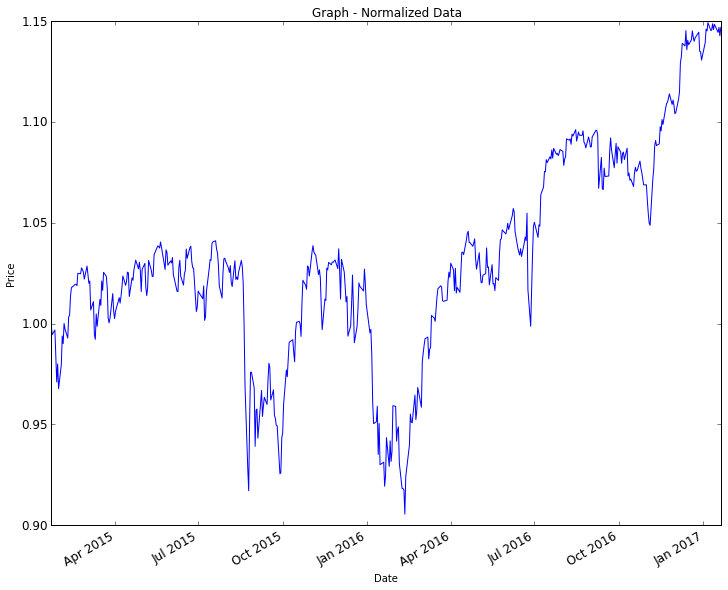

In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LinearRegression

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
    return df


def plot_data(df, title):
    ax = df.plot(title=title, fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    
    print df.loc[0]
    
    # Regression line
    x = df.index
    for i in df:
        y.append = df.loc[1]
    # y = 5*x + 10 
    # y = df.get_loc[0]
    
    # fit with np.polyfit
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, y, '.')
    plt.plot(x, m*x + b, '-')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    
def plot_stocks(df, columns, start_index, end_index):   
    # Normalize stock prices
    df = df/ df.ix[0,:]
    
    # Plot stocks separately
    plot_data(df.ix[start_index:end_index,columns], title="Graph - Normalized Data")


def visualize_me_stocks():
    # Define a date range
    start = '2015-01-22'
    end = '2017-01-22'
    dates = pd.date_range(start, end)
    
    # Create linear regression object
    regr = LinearRegression()
    
    # Choose stock symbols to read.  SPY will be added in get_data()
    symbols = ['UPRO','GOOG','AAPL','AMZN','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD']
    
    # Get stock data
    df = get_data(symbols, dates)

    # Plot stocks
    for i in symbols:
        plot_stocks(df, i, start, end)
    
if __name__ == "__main__":
    visualize_me_stocks()

In [23]:
import csv
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

dates = []
prices = []

def get_data(filename):
	with open(filename,'r') as csvfile:
		csvFileReader = csv.reader(csvfile)
		next(csvFileReader) #skipping column names
		for row in csvFileReader:
			dates.append(int(row[0]))
			prices.append(float(row[1]))
	return

def show_plot(dates,prices):
	linear_mod = linear_model.LinearRegression()
	dates = np.reshape(dates,(len(dates),1)) # converting to matrix of n X 1
	prices = np.reshape(prices,(len(prices),1))
	linear_mod.fit(dates,prices) #fitting the data points in the model
	plt.scatter(dates,prices,color='yellow') #plotting the initial datapoints 
	plt.plot(dates,linear_mod.predict(dates),color='blue',linewidth=3) #plotting the line made by linear regression
	plt.show()
	return

def predict_price(dates,prices,x):
	linear_mod = linear_model.LinearRegression() #defining the linear regression model
	dates = np.reshape(dates,(len(dates),1)) # converting to matrix of n X 1
	prices = np.reshape(prices,(len(prices),1))
	linear_mod.fit(dates,prices) #fitting the data points in the model
	predicted_price =linear_mod.predict(x)
	return predicted_price[0][0],linear_mod.coef_[0][0] ,linear_mod.intercept_[0]

get_data('data/GOOG.csv') # calling get_data method by passing the csv file to it
print dates
print prices
print "\n"

show_plot(dates,prices) 
#image of the plot will be generated. Save it if you want and then Close it to continue the execution of the below code.

predicted_price, coefficient, constant = predict_price(dates,prices,29)  
print "The stock open price for 29th Feb is: $",str(predicted_price)
print "The regression coefficient is ",str(coefficient),", and the constant is ", str(constant)
print "the relationship equation between dates and prices is: price = ",str(coefficient),"* date + ",str(constant) 

ValueError: invalid literal for int() with base 10: '2017-01-20'